# Import relevant libraries

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
sns.set()

# Import iris dataset

In [2]:
# импортируем датасет Iris
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris
# наши перменные - длина чашелистиков, ширина чашелистиков, длина лепестка и ширина лепестка
# нам необходимо классифицировать iris цветки на три категории - Setosa(0), Versicolour(1) и Virginica(2)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Посмотрим на статистику по iris датасету
print ("Iris data set Description :: ", iris['DESCR'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

# Data Exploration & Baseline Models

In [5]:
# Создадим переменные: X - матрицу наших фичей и y - dependent variable vector
X = iris.data
y = iris.target

In [6]:
# Первоначально создадим базовую модель логистической регрессии и потом будем ее улучшать
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

In [7]:
print(X_train.shape)

(120, 4)


In [8]:
print(X_test.shape)

(30, 4)


In [9]:
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [10]:
classifier_logistic.score(X_train, y_train)

0.975

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier_logistic.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

In [12]:
# Первоначальная точность нашей базовой модели составляет 97,5% на тренировочном, и аж 100% на тестовом
# Очень высокое значение, главная причина в том что, данные в датасете очень хорошо подобраны первоначально
# Посмотрим что будет, если использовать базовую модель метода опорных векторов - SVM

In [13]:
# Построим первоначально базовую модель SVM без дполнительной подготовки данных
classifier_SVM_1 = SVC(kernel = 'rbf', random_state = 42)
classifier_SVM_1.fit(X_train, y_train)

SVC(random_state=42)

In [14]:
classifier_SVM_1.score(X_train, y_train)

0.975

In [15]:
y_pred2 = classifier_SVM_1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

In [16]:
# Базовая точность вышла такая же, как и в логистической регрессии
# Более детально изучим наши данные

In [17]:
# Построим матрицу корреляций (но для этого первоначально пересоздадим наш первоначальный датасет в pandas)
dataset_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataset_iris["target"] = iris.target

dataset_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


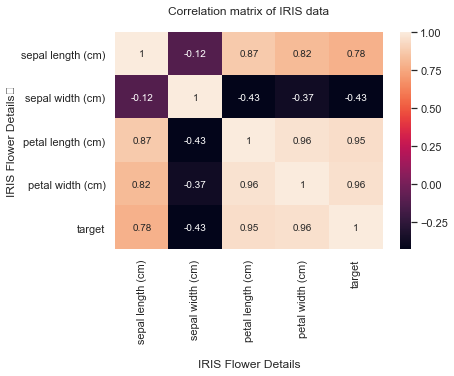

In [18]:
cor_matrix = sns.heatmap(dataset_iris.corr(), annot=True)
cor_matrix.set(xlabel='\nIRIS Flower Details', ylabel='IRIS Flower Details\t', title = "Correlation matrix of IRIS data\n")

plt.show()

In [19]:
# Основные выводы по нашей матрице корреляций
# Сильно заметна очень высокая степень корреляции между перменными petal length (длина лепестка) и petal width (ширина лепестка), - порядка 0,96
# Также наблюдаем почти аналогичную ситуацию между petal length и sepal length (длина чашелистика) - 0,87
# Из за такой высокой корреляции наших переменных наша модель может работать некорректно, поэтому уберем переменную petal length и снова взглянем на нашу матрицу корреляции
# Также уберем переменную sepal length из за высокой степени корреляции с переменной petal width - 0,82
dataset_iris_without_petal_length_sepal_length = dataset_iris.drop(['petal length (cm)', 'sepal length (cm)'], axis = 1)
dataset_iris_without_petal_length_sepal_length

,sepal width (cm),petal width (cm),target
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


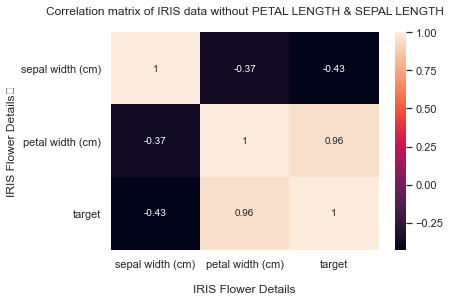

In [20]:
cor_matrix_without_petal_length_sepal_length = sns.heatmap(dataset_iris_without_petal_length_sepal_length.corr(), annot=True)
cor_matrix_without_petal_length_sepal_length.set(xlabel='\nIRIS Flower Details', ylabel='IRIS Flower Details\t', title = "Correlation matrix of IRIS data without PETAL LENGTH & SEPAL LENGTH\n")

plt.show()

In [21]:
# Теперь в нашем датасете нет переменных с очень высокой степенью корреляции

In [22]:
dataset_iris_semifinal = dataset_iris_without_petal_length_sepal_length

In [23]:
dataset_iris_semifinal.describe(include = "all")
# Пустых значений у нас нет

,sepal width (cm),petal width (cm),target
count,150.000000,150.000000,150.000000
mean,3.057333,1.199333,1.000000
std,0.435866,0.762238,0.819232
min,2.000000,0.100000,0.000000
25%,2.800000,0.300000,0.000000
50%,3.000000,1.300000,1.000000
75%,3.300000,1.800000,2.000000
max,4.400000,2.500000,2.000000


In [24]:
# Посмотрим на распределение наших переменных

<AxesSubplot:xlabel='sepal width (cm)'>

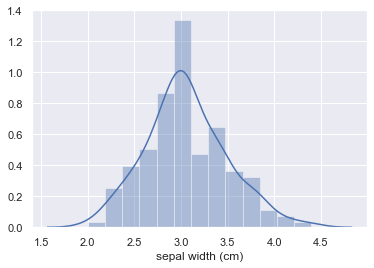

In [25]:
sns.distplot(dataset_iris_semifinal['sepal width (cm)'])
# распределение переменной sepal width (cm) нормальное. Все хорошо.

<AxesSubplot:xlabel='petal width (cm)'>

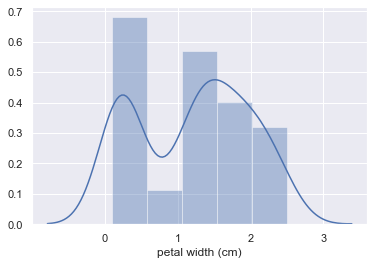

In [26]:
sns.distplot(dataset_iris_semifinal['petal width (cm)'])
# распределение переменной petal width (cm) не совсем нормальное, но так как разбой значений не так высок, думаю коррекции не нужны. Вылетов нет, так что все хорошо
# Плюс в SVM мы будем использовать не только линейные ядра, поэтому самое главное чтобы не было вылетов. Все хорошо.

In [27]:
# Теоретически можно еще сделать feature scalling наших переменных, но разброс значений наших переменных не высокий, поэтому посчитаем без него для большей понятности результатов вконце

# Kernel SVM Model with GridSearch method

In [28]:
X2 = dataset_iris_semifinal.drop(['target'],axis=1)
y2 = dataset_iris_semifinal['target']

In [29]:
X2

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


In [30]:
y2

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, shuffle = True, random_state = 42)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [33]:
# Подберем лучшие гипперпараметры для нашей модели используя метод GridSearch и Кросс валидацию
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [0.1, 0.01, 0.001, 0.0001], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [0.1, 0.01, 0.001, 0.0001]},
    {"kernel": ["sigmoid"], "gamma": [0.1, 0.01, 0.001, 0.0001], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2,3,4], "gamma": [0.1, 0.01, 0.001, 0.0001], "C": [1, 10, 100, 1000]}
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\93ttt\AppData\Roaming\Python\Py

Best parameters set found on development set:

{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

Grid scores on development set:

0.945 (+/-0.115) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.581 (+/-0.334) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.272 (+/-0.643) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.272 (+/-0.643) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.947 (+/-0.107) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.945 (+/-0.115) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.581 (+/-0.334) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.272 (+/-0.643) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.947 (+/-0.107) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.947 (+/-0.107) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.945 (+/-0.115) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.581 (+/-0.334) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.941 (+/-0.132) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.947 (+/-0.107) for {'C': 1000, 'gamma

In [34]:
classifier_final_SVM_best_precision = SVC(kernel = 'poly', C = 1, gamma = 0.1, degree = 2, random_state = 42)
classifier_final_SVM_best_precision.fit(X_train, y_train)

SVC(C=1, degree=2, gamma=0.1, kernel='poly', random_state=42)

In [35]:
classifier_final_SVM_best_precision.score(X_train, y_train)

0.9416666666666667

In [36]:
y_pred3 = classifier_final_SVM_best_precision.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
accuracy_score(y_test, y_pred3)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

In [37]:
classifier_final_SVM_best_recall = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 42)
classifier_final_SVM_best_recall.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=42)

In [38]:
classifier_final_SVM_best_recall.score(X_train, y_train)

0.9583333333333334

In [39]:
y_pred4 = classifier_final_SVM_best_recall.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
accuracy_score(y_test, y_pred4)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

In [40]:
# Лучшие параметры для нашей классификационной модели опорных векторов такие: - {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'} для precision
# {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} для recall
# Точность на тестовом датасете составляет также 100% - невероятное число.
# Есть явное ощущение что где то есть ошибка, и поэтому такая максимальная точность.
# Также отметим, что точность на тренировочном датасете даже меньше чем первоначальная точность в логистической регрессии, что также очень странно
# Думаю причина в том, что убрали две переменные
# Чтобы убедиться в этом, построим еще одну модель со всеми переменными, но с лучшими гиперпараметрами для SVM

In [41]:
X3 = dataset_iris.drop(['target'],axis=1)
y3 = dataset_iris['target']

In [42]:
X3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, shuffle = True, random_state = 42)

In [45]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [0.1, 0.01, 0.001, 0.0001], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [0.1, 0.01, 0.001, 0.0001]},
    {"kernel": ["sigmoid"], "gamma": [0.1, 0.01, 0.001, 0.0001], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2,3,4], "gamma": [0.1, 0.01, 0.001, 0.0001], "C": [1, 10, 100, 1000]}
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\93ttt\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\93ttt\AppData\Roaming\Python\Py

Best parameters set found on development set:

{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

Grid scores on development set:

0.963 (+/-0.081) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.927 (+/-0.058) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.289 (+/-0.711) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.289 (+/-0.711) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.081) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.963 (+/-0.081) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.936 (+/-0.063) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.289 (+/-0.711) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.964 (+/-0.081) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.970 (+/-0.086) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.963 (+/-0.081) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.936 (+/-0.063) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.964 (+/-0.081) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.964 (+/-0.081) for {'C': 1000, 'gamma

In [46]:
# Лучшие параметры - {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'} для precision
# {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} для recall

In [47]:
classifier_final_SVM_best_precision2 = SVC(kernel = 'poly', C = 1, degree = 2, gamma = 0.1, random_state = 42)
classifier_final_SVM_best_precision2.fit(X_train, y_train)

SVC(C=1, degree=2, gamma=0.1, kernel='poly', random_state=42)

In [48]:
classifier_final_SVM_best_precision2.score(X_train, y_train)

0.975

In [49]:
y_pred5 = classifier_final_SVM_best_precision2.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
accuracy_score(y_test, y_pred5)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

In [50]:
classifier_final_SVM_best_recall2 = SVC(kernel = 'rbf', C = 100, gamma = 0.01, random_state = 42)
classifier_final_SVM_best_recall2.fit(X_train, y_train)

SVC(C=100, gamma=0.01, random_state=42)

In [51]:
classifier_final_SVM_best_recall2.score(X_train, y_train)

0.9833333333333333

In [52]:
y_pred6 = classifier_final_SVM_best_recall2.predict(X_test)
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
accuracy_score(y_test, y_pred6)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

In [53]:
# В итоге точность на тестовом датасете также 100%, но точность на тренировочном (recall model) выше стала - около 98,3%
# Думаю что дело в том, что включили cтартовые две переменные, которые я убрал вначале

In [54]:
# Ответ на вопрос - Какие подходы позволяют логистической регрессии работать на нескольких классах?
# Есть метод One & All, когда мы рассматриваем каждый класс как задачу бинарной классификации. То есть мы разбиваем набор данных мультиклассовой классификации на задачи двоичной классификации.
# Например нам нужно классифицировать животных (у нас есть кошки, собаки, коровы, овцы). Итого если взять кошку, то мы будем использовать ее как 1, а все остальные это 0
# Аналогично и с другими животными. Этот метод еще называют One & Rest
# Также есть еще второй метод One & One, где В отличие от one-vs-rest, который разбивает набор данных на один двоичный набор данных для каждого класса, подход one-vs-one разбивает набор данных на один набор данных для каждого класса по сравнению с каждым другим классом.
# Итого в нашем примере это будет (если кошка): кошка против собаки, кошка против коровы и кошка против овцы
# В свою очередь этот метод предполагает создание намного больше наборов данных (что при определенных обстоятельствах может значительно повлиять на производительность)